## De-Identification:
* The process of removing identifying information from a dataset.
* Sometimes used synonymously with *anonymization* and *pseudonymization*.

## Re-Identification
* The process of combining de-identified data with auxiliary information to uniquely re-identify individuals.

In [90]:
import pandas as pd

adult  = pd.read_csv("https://raw.githubusercontent.com/um-dsp/CIS545/main/adult-with-pii.csv")

In [91]:
adult.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [92]:
adult.columns

Index(['Name', 'DOB', 'SSN', 'Zip', 'Age', 'Workclass', 'fnlwgt', 'Education',
       'Education-Num', 'Marital Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country',
       'Target'],
      dtype='object')

In [93]:
adult.shape

(32561, 19)

In [94]:
adult.dtypes

Name              object
DOB               object
SSN               object
Zip                int64
Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours per week     int64
Country           object
Target            object
dtype: object

In [95]:
adult.values

array([['Karrie Trusslove', '9/7/1967', '732-14-6110', ..., 40,
        'United-States', '<=50K'],
       ['Brandise Tripony', '6/7/1988', '150-19-2766', ..., 13,
        'United-States', '<=50K'],
       ['Brenn McNeely', '8/6/1991', '725-59-9860', ..., 40,
        'United-States', '<=50K'],
       ...,
       ['Reuben Skrzynski', '8/9/1966', '314-48-0219', ..., 40,
        'United-States', '<=50K'],
       ['Caye Biddle', '5/19/1978', '647-75-3550', ..., 20,
        'United-States', '<=50K'],
       ['Hortense Hardesty', '5/11/2012', '690-42-5638', ..., 40,
        'United-States', '>50K']], dtype=object)

In [96]:
# To de-identify a record: just drop the columns that contain clear identifiers
adult_de_identified = adult.copy().drop(columns = ['Name', 'SSN']) # de-identified data - released
adult_pii = adult[['Name','DOB','Zip']] # will serve as auxiliary data
adult_de_identified.head()

,DOB,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,9/7/1967,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,6/7/1988,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/6/1991,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4/6/2009,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/16/1951,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [97]:
adult_de_identified.columns

Index(['DOB', 'Zip', 'Age', 'Workclass', 'fnlwgt', 'Education',
       'Education-Num', 'Marital Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country',
       'Target'],
      dtype='object')

# Linkage Attack
**What we know**: Our friend Amelia Madison was born on 11/17/1978 and lives in zip code 74598.

**Goal**: Using the de-identified data and what we know about Amelia, our goal is to determine her income.

**Simple linkage attack**:
- Matching columns of the de-identified data with attributes we know about Amelia, we find DOB and Zip.
- Filter rows in the de-identified dataset that match Amelia's DOB and Zip.
- If there is a unique record, we've successfully re-identified Amelia :-). Otherwise, we need to see if we can narrow down to possible matches based on attribute values we know.

In [98]:
# Get all those that match Amelia Madison
Amelia_record = adult_pii[adult_pii['Name'] =='Amelia Madison']
print(Amelia_record)

                 Name         DOB    Zip
5725   Amelia Madison  11/17/1978  74598
11663  Amelia Madison    9/7/1967  67306


In [99]:
# perform a merge/join of Amelia Madison records with de-identified data based on common columns: DOB, ZIP
pd.merge(Amelia_record,adult_de_identified,left_on=['DOB','Zip'], right_on=['DOB','Zip'])


,Name,DOB,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Amelia Madison,11/17/1978,74598,32,Private,373263,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
1,Amelia Madison,9/7/1967,67306,64,Private,171373,11th,7,Widowed,Farming-fishing,Unmarried,White,Female,0,0,40,United-States,<=50K


**Note**: In the world of databases, what we did above is synonymous with the join of two tables over common columns.

**Have we succeeded?**

There are two people named Amelia Madison, and they both make  <=50K. Hence, our friend Amelia also makes <=50K.

Using the DOB and zip, we know that the real Amelia Madison we are looking for is the first record because DOB and Zip match what we already know about Amelia.

### Could we have identified Amelia with less background knowledge?

In [100]:
pd.merge(Amelia_record,adult_de_identified,left_on=['Zip'],right_on=['Zip'])

,Name,DOB_x,Zip,DOB_y,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Amelia Madison,11/17/1978,74598,11/17/1978,32,Private,373263,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
1,Amelia Madison,9/7/1967,67306,9/7/1967,64,Private,171373,11th,7,Widowed,Farming-fishing,Unmarried,White,Female,0,0,40,United-States,<=50K


Still, we learn the same as with DOB and Zip, which means only Zip would have been enough to identify Amelia.

In [101]:
pd.merge(Amelia_record,adult_de_identified,left_on=['DOB'],right_on=['DOB'])

,Name,DOB,Zip_x,Zip_y,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Amelia Madison,11/17/1978,74598,74598,32,Private,373263,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
1,Amelia Madison,9/7/1967,67306,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,Amelia Madison,9/7/1967,67306,67306,64,Private,171373,11th,7,Widowed,Farming-fishing,Unmarried,White,Female,0,0,40,United-States,<=50K
3,Amelia Madison,9/7/1967,67306,62254,46,Self-emp-not-inc,119944,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K


Although we have four records returned, still the right Amelia is the first record.

## **Broadly speaking**: the less number of unique attribute values we have in the data, the more succiptible is the dataset to linkage attacks on rarely frequent attribute values.  

Let's empirically explore that in our dataset ...

Text(0, 0.5, 'Number of Unique Occurences')

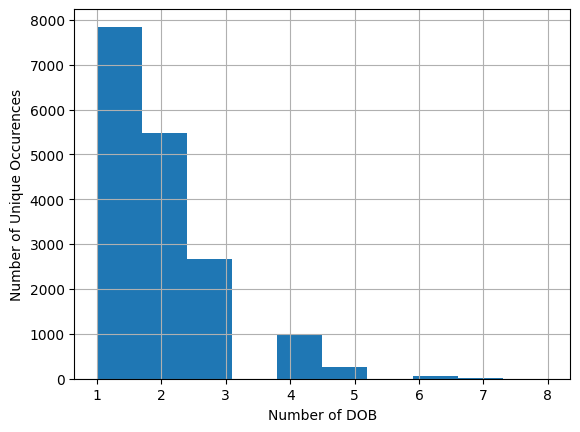

In [102]:
import matplotlib.pyplot as plt
adult_pii['DOB'].value_counts().hist()
plt.xlabel('Number of DOB') # once, twice, ...
plt.ylabel('Number of Unique Occurences') #

**Observation**:The above histogram shows that the overwhelming majority of DOBs occur once (followed by twice and three times), and no DOB occurs more than 8 times, which means that DOB is fairly selective - i.e., is pretty effective in narrowing down records to a target individual.

Let's do the same analysis with Zip ...

Text(0, 0.5, 'Number of Occurences')

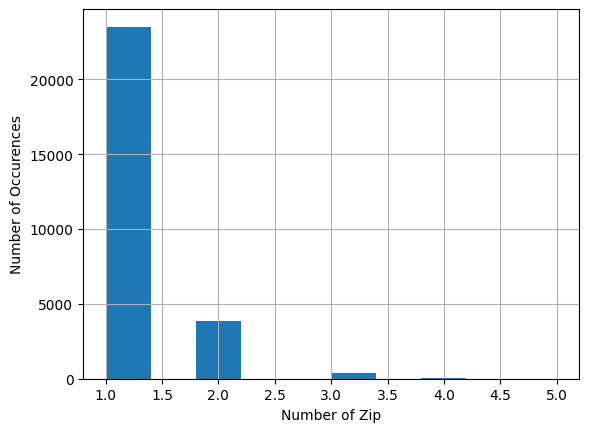

In [103]:
adult_pii['Zip'].value_counts().hist()
plt.xlabel('Number of Zip') # once, twice, ...
plt.ylabel('Number of Occurences') #

**Observation**: Zip code appears to be even more selective than DOB, because nearly all Zip codes occur once.

**How many people can we re-identify uniquely?**
To answer this, we can leverage our auxiliary information. Our goal here is to know how many possible identities are returned for each record in the dataset.

Let's check if DOB can serve this purpuse ...


<Axes: >

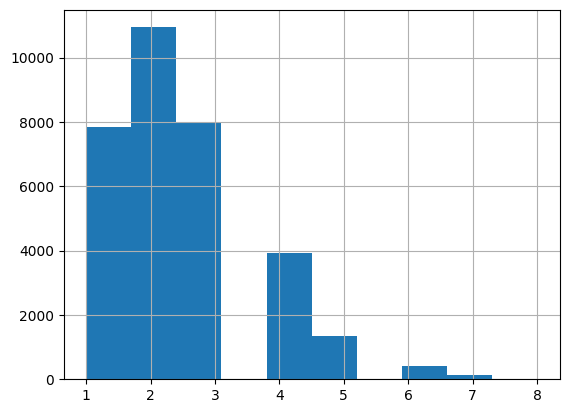

In [104]:
probe_for_attack = pd.merge(adult_pii, adult_de_identified, left_on=['DOB'], right_on=['DOB'])
probe_for_attack['Name'].value_counts().hist()

**Observation**:The histogram shows the number of records with each number of possible identities. By joining the two datasets based on DOB only, it turns out we can uniquely identify almost 8K of the records (20% of a total of 32K), and an additional 10K records are narrowed down to 2 possible identities.

But, still this seems a lot of alterntives to sift through.
Let's try the same probing with DOB and Zip ...


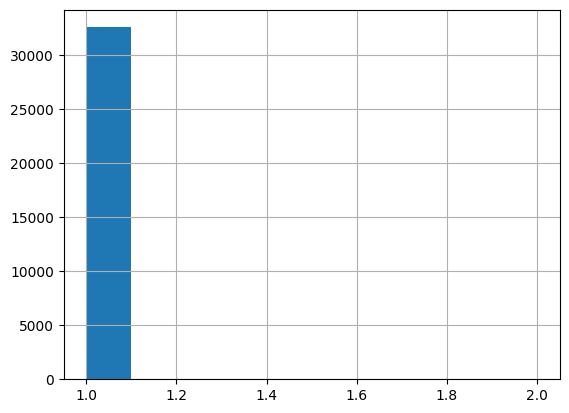

In [105]:
probe_for_attack = pd.merge(adult_pii, adult_de_identified, left_on=['DOB','Zip'], right_on=['DOB','Zip'])
probe_for_attack['Name'].value_counts().hist();

**Observation**: Using DOB and Zip to merge the de-identified and the auxiliary datasets, we can **re-identify essentially everyone!**. Although we know in reality that many people share DOB and Zip, combining the two makes them **exremly selective**.
Remember (from lecture 1) the 87% re-identification of US population by a combination of Zip code, DOB, and gender?

Let's just check whether we've re-identified everyone, by printing out the number of possible data records for each identity.


In [106]:
probe_for_attack['Name'].value_counts()

Amelia Madison       2
Barnabe Haime        2
Antonin Chittem      2
Karrie Trusslove     1
Glenna Chidlow       1
                    ..
Willetta Orteu       1
Georgy McKeaney      1
Josselyn Tilly       1
Rodina Downie        1
Hortense Hardesty    1
Name: Name, Length: 32560, dtype: int64

**Observation**: It turns out that we missed only 3 people, which happen to share a combination of Zip code and DOB.

## Aggregation as Potential Defense Against Re-Identification Attacks

In the lecture, we saw a micro-aggregation alternative to limit disclosure of private information.

For example, release mean values for attributes:


In [107]:
adult['Age'].mean()

38.58164675532078

In [108]:
adult['Hours per week'].mean()

40.437455852092995

In [109]:
adult['Education-Num'].mean()

10.0806793403151

**The issue with micro-aggregation**: At the core of micro-aggregation is that aggregate statistics are broken down into smaller groups.

For instance, the average age of people with a particular education level:


In [110]:
adult[['Education','Age']].groupby('Education').mean()

,Age
Education,
10th,37.429796
11th,32.355745
12th,32.000000
1st-4th,46.142857
5th-6th,42.885886
7th-8th,48.445820
9th,41.060311
Assoc-acdm,37.381443
Assoc-voc,38.553546


**Observation**: Micro-aggregation is effective only when the group size is fairly large so as to mask the contribution of a particular individual to the aggregate statistic. However, what if the group has a handful or just one record in it? In that case, most individuals have unique Zip code, so if we compute the everage age by Zip code, then most of the 'averages' actually reveal an individual's exact age. Let's see that in practice ...

In [111]:
adult[['Zip', 'Age']].groupby('Zip').mean()

,Age
Zip,
4,55.0
12,24.0
16,59.0
17,42.0
18,24.0
...,...
99978,51.0
99989,19.0
99991,17.0


In [114]:
adult.groupby('Zip').count().head(50)

,Name,DOB,SSN,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
Zip,,,,,,,,,,,,,,,,,,
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
16,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1
17,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2
18,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
23,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
28,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
34,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
43,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


**Observation**: From the above count of each Zip code, we realize that when there is only one member in a Zip code, the average age of that Zip code is the same as the individual's age -that is unique re-identification.

**Question**: How big a group is "big enough" to limit re-identification attacks?

**Answer**: Hard to say -depends on the data and on the attack. Even very large groups don't make micro-aggregation compltetley robust against attacks.

Let's see how ...

## Differencing Attacks
Suppose you release multiple aggregation statistics over the same data. For instance, consider the following two queries:

In [115]:
age_sum_all = adult['Age'].sum()
age_sum_all

1256257

In [116]:
age_sum_except_Amelia_Madison= adult[adult['Name']!='Amelia Madison']['Age'].sum()
age_sum_except_Amelia_Madison

1256161

In [117]:
# Now  take the difference between the results
diff = age_sum_all - age_sum_except_Amelia_Madison
diff

96

**Observation**: Remember, we have two Amelia Madison's in our dataset. The difference between the above two sum queries is 96, which is the sum of the ages (32+64) of the two Amelia's. If Amelia was the only individual, the difference would have been an exact age of that individual. Notice such a re-identification can happen even in the face of very large size of the groups.

# Checking for $k$-Anonymity


In [118]:
import pandas as pd

# Sample dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hank', 'Ivy'],
    'Age': [32, 25, 34, 30, 31, 45, 29, 32, 33],
    'Zip_Code': [12345, 12345, 54321, 54321, 12345, 12345, 54321, 54321, 54321]
}

df = pd.DataFrame(data)


In [119]:
def is_k_anonymous(df, k):
    for _, group in df.groupby(df.columns.tolist()[1:]):
        if len(group) < k:
            return False
    return True


In [122]:
# test k-anonymity
for k in range(1,int(len(df)/2)):
  result= is_k_anonymous(df, k)
  if result:
    print(f"The dataset is {k}-anonymous.")
  else:
    print(f"The dataset is not {k}-anonymous.")

The dataset is 1-anonymous.
The dataset is not 2-anonymous.
The dataset is not 3-anonymous.
